# MLP que modela las operaciones aritméticas (+,-,*,/)

Ejemplo simple de una red neuronal MLP que aprende las operaciones aritméticas simples.

In [13]:
import pandas as pd
import numpy as np

%matplotlib notebook

In [32]:
#Define el dataset con los features que queremos representar

import random
def get_random_ops(rows=100):
    data = []
    for i in range(0, rows):
        a = random.randint(1,100)
        b = random.randint(1,100)
        suma, resta, multi, divi = random.choice([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ])
        
        if suma == 1: y = a+b
        if resta == 1: y = a-b
        if multi == 1: y = a*b
        if divi == 1: y = a/b
            
        data.append({
            "a":a,
            "b":b,
            "suma": suma,
            "resta": resta,
            "multi": multi,
            "divi": divi,
            "y": round(y, 2)
        })
    return data

In [42]:
# Primero se entrena con pocos datos para verificar el comportamiento de la MLP
# Después se van afinando los hiperparámetros para obtener mejores resultados

# Paso 1 y 2
#data = pd.DataFrame(get_random_ops(25000))

# Paso 3
#data = pd.DataFrame(get_random_ops(100000))

#Paso 4
data = pd.DataFrame(get_random_ops(10000000))

data[["a", "b", "suma", "resta", "multi", "divi", "y"]].head()

,a,b,suma,resta,multi,divi,y
0,62,53,0,0,0,1,1.17
1,90,42,0,0,0,1,2.14
2,57,5,0,0,1,0,285.00
3,87,72,1,0,0,0,159.00
4,87,17,0,0,1,0,1479.00


<IPython.core.display.Javascript object>


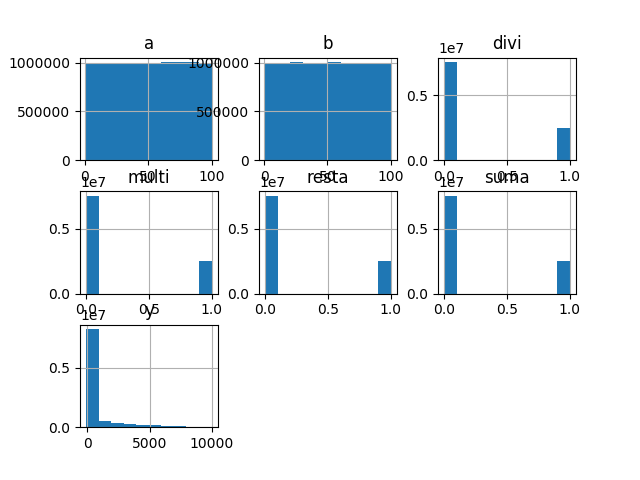

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000079B4F1CCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000007981B6DAC8>]], dtype=object)

In [43]:
data.hist()

In [35]:
# prepara el modelo
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["a", "b", "suma", "resta", "multi", "divi"]], data["y"], 
    test_size=0.30, random_state=42
)

In [45]:
model = MLPRegressor(
    # Paso 1
    max_iter=800,
    # Paso 2
    hidden_layer_sizes=(100,100,100),
    learning_rate_init=0.0001,
    verbose = False
)
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
print(X_test.iloc[3000])
print(y_test.iloc[3000])
print(model.predict([X_test.iloc[3000]]))

a        61
b         4
suma      0
resta     0
multi     1
divi      0
Name: 214250, dtype: int64
244.0
[ 242.84084277]


In [47]:
predict = model.predict((X_test))
print("Predict: %s" % list(predict[:5]))

Predict: [1837.847243315013, 131.44731061408842, 108.42987626855128, -2.9691076464479487, 80.484346233208242]


In [40]:
data_check = pd.DataFrame(predict, columns=["predict"])
data_check["y"]=list(y_test)
data_check.set_index(["y"], drop=False, inplace=True)
data_check.sort_values(by=["y"], inplace=True)

<IPython.core.display.Javascript object>


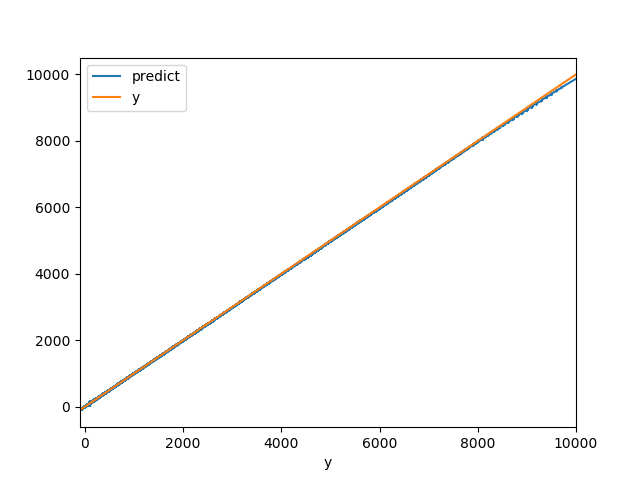

In [48]:
data_check.plot()